In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/data.csv")

# We handle the missing values by dropping rows with any missing values
cleaned_data = data.dropna()
print(cleaned_data.shape)
# Seperate the dependent variable (price) from the independent variables.
features = ['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors',
            'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size',
            'Location_Score', 'Distance_to_Center']
X = cleaned_data[features].values
y = cleaned_data['Price'].values

# Add a bias term (column of ones) to the features
X = np.hstack((np.ones((X.shape[0], 1)), X))
# @ Denotes matrix multiplication
# Compute weights using the Normal Equation: W = (X^T X)^(-1) X^T y
W = np.linalg.inv(X.T @ X) @ X.T @ y
# This computation yields the weights needed for all the independent terms that will minimize RMSE
# Print the weights
print("Weights (coefficients) of the linear regression model:")
for i, coef in enumerate(W):
    if i == 0:
        print(f"Intercept: {coef:.2f}")
    else:
        print(f"{features[i-1]}: {coef:.2f}")

(470, 12)
Weights (coefficients) of the linear regression model:
Intercept: -28733.82
Square_Feet: 10.17
Num_Bedrooms: 505.45
Num_Bathrooms: 295.90
Num_Floors: 215.23
Year_Built: 15.07
Has_Garden: 298.80
Has_Pool: 479.54
Garage_Size: 11.35
Location_Score: 48.14
Distance_to_Center: -20.10


Root Mean Square Error (RMSE): 189.49


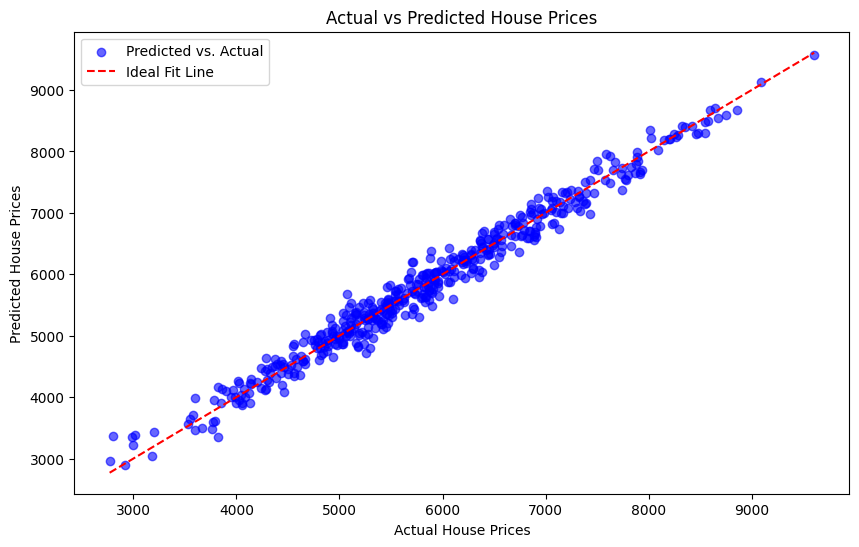

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Predict house prices using the computed weights
# y_pred = X @ W
y_pred = X @ W

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

# Plot actual (X-axis) vs. predicted prices (Y-axis)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue', label='Predicted vs. Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Fit Line')  # Line of perfect prediction
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()


<ipython-input-9-977494703c85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Square_Feet_Squared'] = cleaned_data['Square_Feet'] ** 2
<ipython-input-9-977494703c85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Distance_to_Center_Squared'] = cleaned_data['Distance_to_Center'] ** 2


Weights (coefficients) of the polynomial regression model:
Intercept: -28727.90349214
Square_Feet: 9.02
Square_Feet_Squared: 0.00
Num_Bedrooms: 505.50
Num_Bathrooms: 297.12
Num_Floors: 216.41
Year_Built: 15.10
Has_Garden: 297.68
Has_Pool: 479.50
Garage_Size: 11.28
Location_Score: 48.22
Distance_to_Center: -15.20
Distance_to_Center_Squared: -0.24
RMSE of Original Model: 189.49
RMSE of Quadratic Model: 188.75


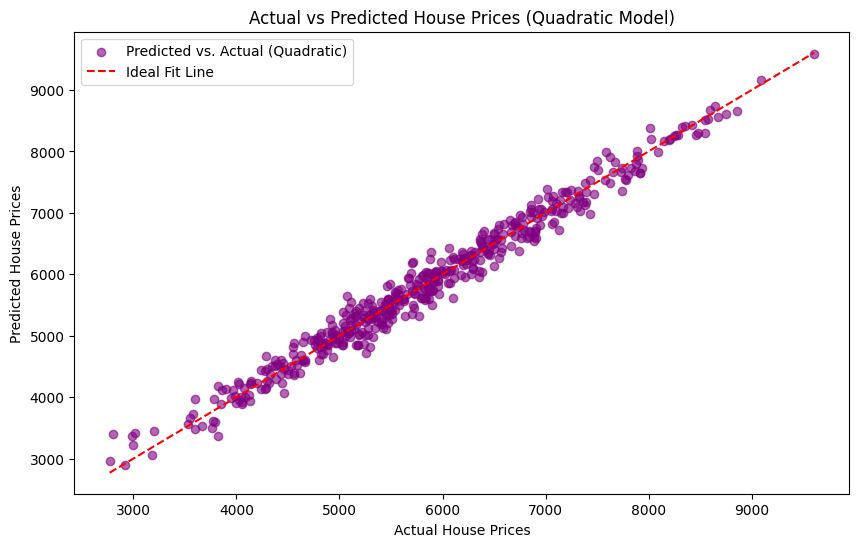

In [ ]:
# Add a quadratic term for 'Square_Feet' to the feature set and 'Distance_to_Center_Squared'
# These 2 terms are chosen to demonstrate a potential +ve coeff and -ve coeff generated
cleaned_data['Square_Feet_Squared'] = cleaned_data['Square_Feet'] ** 2
cleaned_data['Distance_to_Center_Squared'] = cleaned_data['Distance_to_Center'] ** 2

# Update the features to include the quadratic term
features_with_quadratic = ['Square_Feet', 'Square_Feet_Squared', 'Num_Bedrooms', 'Num_Bathrooms',
                           'Num_Floors', 'Year_Built', 'Has_Garden', 'Has_Pool',
                           'Garage_Size', 'Location_Score', 'Distance_to_Center','Distance_to_Center_Squared']
X_quadratic = cleaned_data[features_with_quadratic].values

X_quadratic = np.hstack((np.ones((X_quadratic.shape[0], 1)), X_quadratic))

# Compute weights for the new model
W_quadratic = np.linalg.inv(X_quadratic.T @ X_quadratic) @ X_quadratic.T @ y
print("Weights (coefficients) of the polynomial regression model:")
for i, coef in enumerate(W_quadratic):
    if i == 0:
        print(f"Intercept: {coef:.8f}")
    else:
        print(f"{features_with_quadratic[i-1]}: {coef:.2f}")
# Using new model for prediction
y_pred_quadratic = X_quadratic @ W_quadratic

# Calculating RMSE for the new model
rmse_quadratic = np.sqrt(mean_squared_error(y, y_pred_quadratic))

# RMSE of both models
print(f"RMSE of Original Model: {rmse:.2f}")
print(f"RMSE of Quadratic Model: {rmse_quadratic:.2f}")

# Visualization of predicted vs. actual values for the quadratic model
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_quadratic, alpha=0.6, color='purple', label='Predicted vs. Actual (Quadratic)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Fit Line')  # Line of perfect prediction
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices (Quadratic Model)")
plt.legend()
plt.show()


As we can see there is not too much improvement (decrease in RMSE)
happened upon using the quadratic terms.